# Expresso churn prediction



The churn dataset includes 19 variables including 15 numeric variables and 04 categorical variables.

REGION- the location of each client

TENURE- duration in the network

MONTANT- top-up amount

FREQUENCE_RECH- number of times the customer refilled

REVENUE- monthly income of each client

ARPU_SEGMENT- income over 90 days / 3

FREQUENCE- number of times the client has made an income

DATA_VOLUME- number of connections

ON_NET- inter expresso call

ORANGE- call to orange

TIGO- call to Tigo

ZONE1- call to zones1

ZONE2- call to zones2

MRG- a client who is going

REGULARITY- number of times the client is active for 90 days

TOP_PACK- the most active packs

FREQ_TOP_PACK- number of times the client has activated the top pack packages

CHURN- variable to predict - Target




















































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































# Import libraries and load dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib


In [40]:
df = pd.read_csv("dataset_and_model/Expresso_churn_dataset.csv")

In [41]:
# check the dataset for more information
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [7]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [8]:
# Get more insight through a profile report

profile = ProfileReport(df, title="expresso churn analysis")
#profile.to_file("expresso_churn_report.html")

In [9]:
#profile

Fom the profile report there are missing values several columns and column's data distributions are imbalanced.

In [10]:
# check for missing values
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

## Handling missing values

In [11]:
#rename the columns
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [12]:
#Drop unnecessary columns
df.drop(columns=['user_id', 'region'], inplace=True)
df.head()


,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [13]:
# Handle missing values in montant column
df.montant.isnull().sum()

np.int64(756739)

In [14]:
# find the median of montant and replace the missig values
median_montant = df.montant.median()
df.montant = df.montant.fillna(median_montant)

In [15]:
# Handle missing values in frequence_rech column
frequence_rech_median = df['frequence_rech'].median()
df['frequence_rech'] = df['frequence_rech'].fillna(frequence_rech_median)

In [16]:
# Handle missing values in revenue column
df['revenue'] = df['revenue'].ffill()

In [17]:
# Fill missing values of the remaining columns using forward fill
df.fillna(method='ffill', inplace=True) 

/tmp/ipykernel_24215/615539222.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# Outlier detection and handling

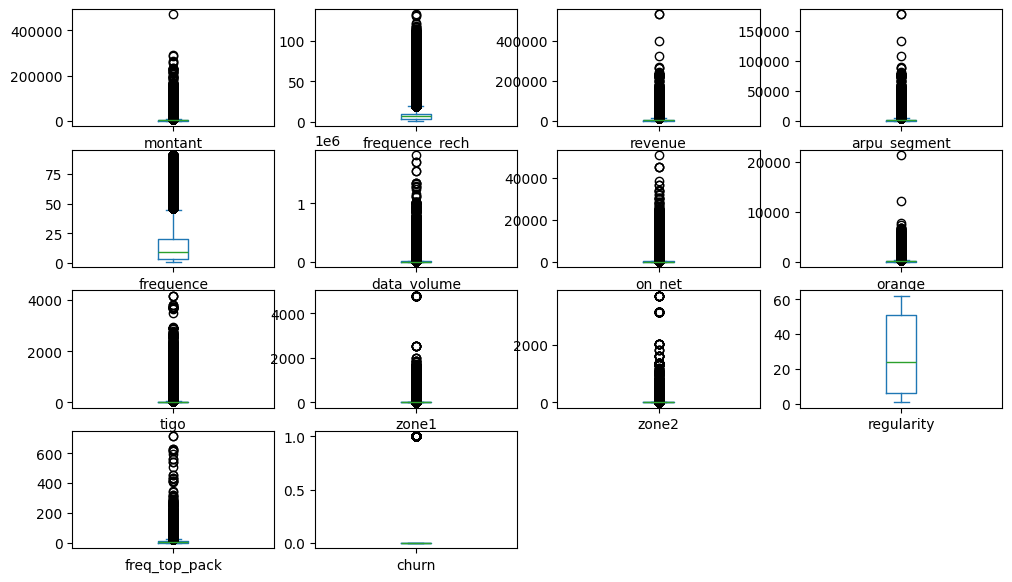

In [18]:
# box plot to visualize outliers
df.plot(kind='box', subplots=True,figsize=(12,7),layout=(4,4))
plt.show()

In [19]:
# Define the function to filter outliers based on percentiles
def filter_outliers(df, lower_percentile=0.1, upper_percentile=0.9):
    df_filtered = df.copy()  # Make a copy of the DataFrame
    
    # Select only numeric columns to avoid issues with string columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    for column in numeric_columns:
        # Calculate the lower and upper limits for the column
        lower_limit = df[column].quantile(lower_percentile)
        upper_limit = df[column].quantile(upper_percentile)
        
        # Apply filtering using the calculated limits
        df_filtered = df_filtered.loc[(df_filtered[column] >= lower_limit) & (df_filtered[column] <= upper_limit)]
    
    return df_filtered

# Columns to filter
filtered_columns = ['montant', 'frequence_rech', 'revenue', 'arpu_segment', 'frequence', 
                    'data_volume', 'on_net', 'orange', 'tigo', 'zone1', 'zone2', 
                    'mrg', 'regularity', 'freq_top_pack']

# Select only the numeric columns to pass to the function
filtered_df = filter_outliers(df[filtered_columns])



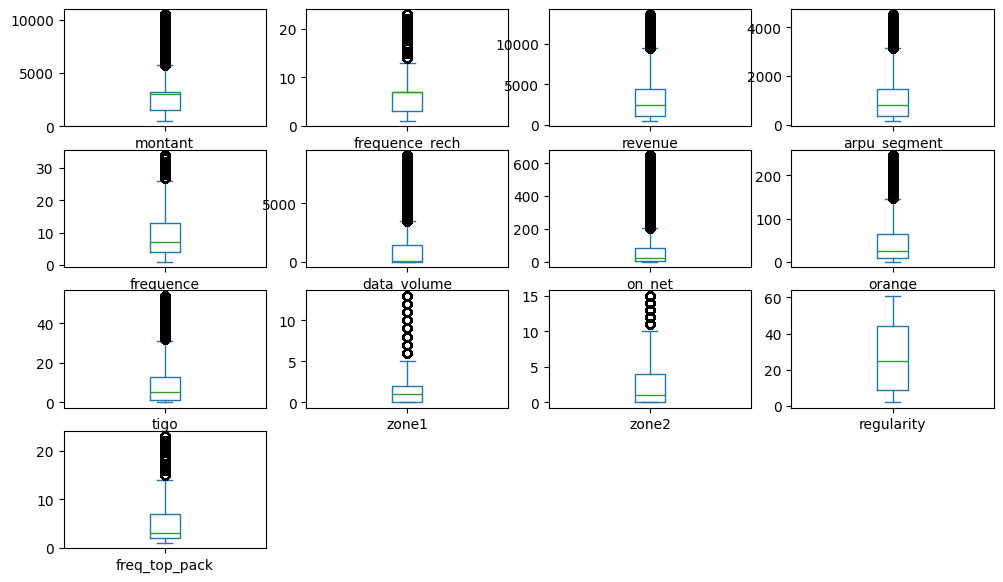

In [20]:
# box plot to visualize outliers
filtered_df.plot(kind='box', subplots=True,figsize=(12,7),layout=(4,4))
plt.show()

In [21]:
# Add back the target column and categorical columns to the filtered DataFrame

# Categorical columns and the target column to add back
add_columns = ['tenure', 'top_pack', 'churn']


# Add the categorical columns and the target column back to the filtered DataFrame
filtered_df = pd.concat([filtered_df, df[add_columns]], axis=1)

# Check the final DataFrame
filtered_df.head()


,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,freq_top_pack,tenure,top_pack,churn
0,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54.0,8.0,K > 24 month,On net 200F=Unlimited _call24H,0
1,3000.0,7.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,4.0,8.0,I 18-21 month,On net 200F=Unlimited _call24H,1
2,3600.0,2.0,1020.0,340.0,2.0,4.0,90.0,46.0,7.0,1.0,2.0,NO,17.0,1.0,K > 24 month,On-net 1000F=10MilF;10d,0
8,1500.0,3.0,1502.0,501.0,12.0,1601.0,2.0,53.0,2.0,1.0,2.0,NO,31.0,8.0,K > 24 month,All-net 500F=2000F;5d,0
14,3500.0,7.0,3500.0,1167.0,7.0,8453.0,18.0,43.0,2.0,1.0,2.0,NO,11.0,6.0,K > 24 month,All-net 500F=2000F;5d,0


In [22]:
# save cleaned dataframe to a csv file
#df.to_csv('cleaned_expresso_churn.csv', index=False)

In [23]:
filtered_df.columns

Index(['montant', 'frequence_rech', 'revenue', 'arpu_segment', 'frequence',
       'data_volume', 'on_net', 'orange', 'tigo', 'zone1', 'zone2', 'mrg',
       'regularity', 'freq_top_pack', 'tenure', 'top_pack', 'churn'],
      dtype='object')

# Encode categorical columns

In [24]:
# Encode our categorical data
categorical_columns = ['mrg','tenure', 'top_pack']

le = LabelEncoder()

for col in categorical_columns:
    filtered_df[col] = le.fit_transform(filtered_df[col])

filtered_df.head()

,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,freq_top_pack,tenure,top_pack,churn
0,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,0,54.0,8.0,7,107,0
1,3000.0,7.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,0,4.0,8.0,5,107,1
2,3600.0,2.0,1020.0,340.0,2.0,4.0,90.0,46.0,7.0,1.0,2.0,0,17.0,1.0,7,108,0
8,1500.0,3.0,1502.0,501.0,12.0,1601.0,2.0,53.0,2.0,1.0,2.0,0,31.0,8.0,7,18,0
14,3500.0,7.0,3500.0,1167.0,7.0,8453.0,18.0,43.0,2.0,1.0,2.0,0,11.0,6.0,7,18,0


In [25]:
filtered_df.shape

(2154048, 17)

In [26]:
# check unique values for encoded columns
filtered_df['mrg'].unique

<bound method Series.unique of 0          0
1          0
2          0
8          0
14         0
          ..
2154041    1
2154042    1
2154045    1
2154046    1
2154047    1
Name: mrg, Length: 2154048, dtype: int64>

In [27]:
filtered_df['top_pack'].unique

<bound method Series.unique of 0          107
1          107
2          108
8           18
14          18
          ... 
2154041     18
2154042     34
2154045     31
2154046     18
2154047     18
Name: top_pack, Length: 2154048, dtype: int64>

In [28]:
filtered_df['tenure'].unique

<bound method Series.unique of 0          7
1          5
2          7
8          7
14         7
          ..
2154041    7
2154042    7
2154045    7
2154046    7
2154047    7
Name: tenure, Length: 2154048, dtype: int64>

# Split dataset to features and target

In [29]:
# Select our target and features
X = filtered_df.drop(['churn'], axis = 1) #features excluding our target
y = filtered_df['churn'] #target

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization

In [31]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement random forest classifier

In [32]:
# Initialize Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

In [33]:
# Fit the model to the training data
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [34]:
# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate model

In [35]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [36]:
accuracy

0.8164589184714066

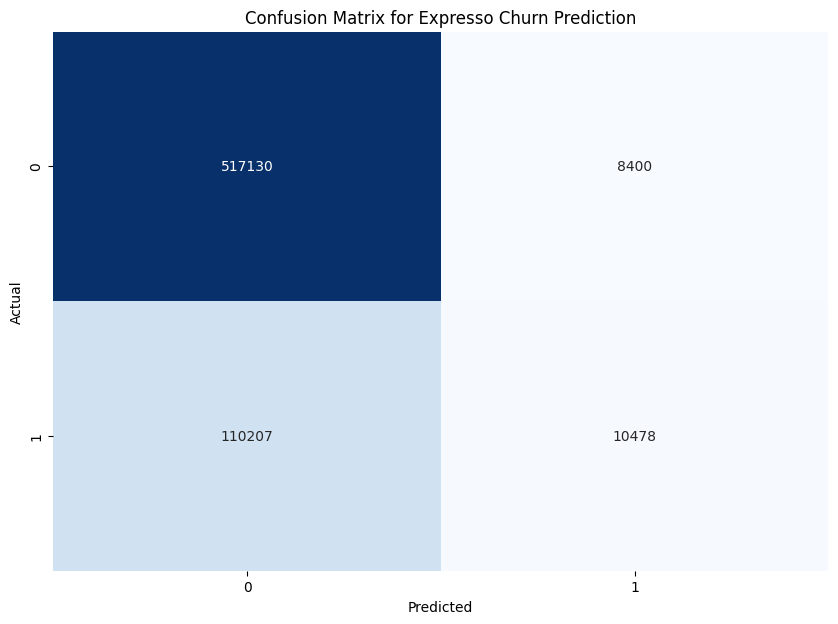

In [37]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Expresso Churn Prediction')
#plt.savefig('CM for Expresso CHurn Prediction.png')
plt.show()

In [38]:
print(f"Precision = {class_report}")

Precision =               precision    recall  f1-score   support

           0       0.82      0.98      0.90    525530
           1       0.56      0.09      0.15    120685

    accuracy                           0.82    646215
   macro avg       0.69      0.54      0.52    646215
weighted avg       0.77      0.82      0.76    646215



**Key Insights:**

The model performs very well at predicting non-churners (class 0), with high precision of 82% and recall of 98%.
However, it struggles with predicting churners (class 1), with low recall of 9% and F1-score 15%.
This could be because of class imbalance—there are many more non-churners than churners in your dataset. As a result, the model may be biased towards predicting non-churn.

In [39]:
# Save the model and scaler to use in Streamlit 
#joblib.dump(clf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler_balanced.pkl')

['scaler_balanced.pkl']